In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
titanic=sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
titanic['age']=titanic['age'].fillna(titanic['age'].median())
titanic.drop(columns=['deck'],inplace=True)


In [5]:
# Drop rows with missing 'embark_town'
titanic.dropna(subset=['embark_town'], inplace=True)

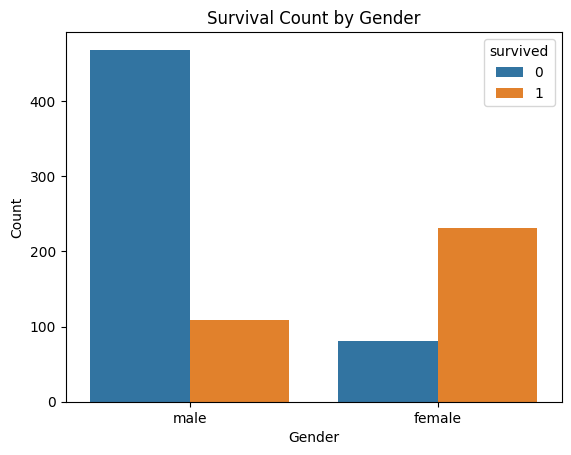

In [6]:
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

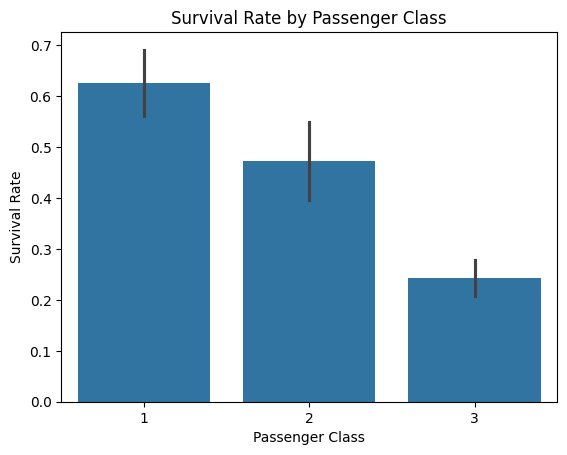

In [7]:
sns.barplot(x='pclass', y='survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [8]:
titanic['familysize']=titanic['parch']+titanic['sibsp']
titanic['is_alone'] = np.where(titanic['familysize'] > 0, 0, 1)

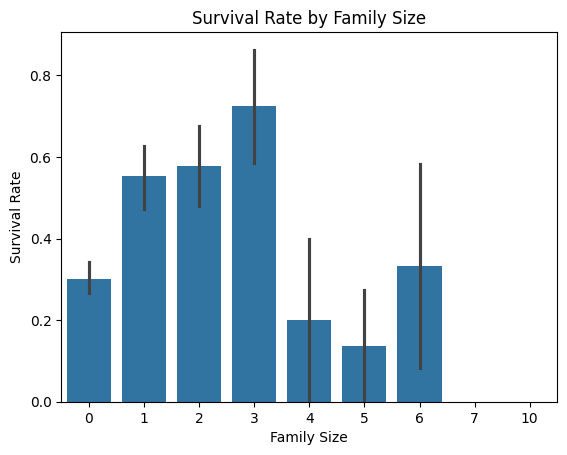

In [9]:
sns.barplot(x='familysize', y='survived', data=titanic)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

In [10]:
pivot = titanic.pivot_table(index='pclass',columns='sex',values='survived')
pivot

sex,female,male
pclass,,
1,0.967391,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


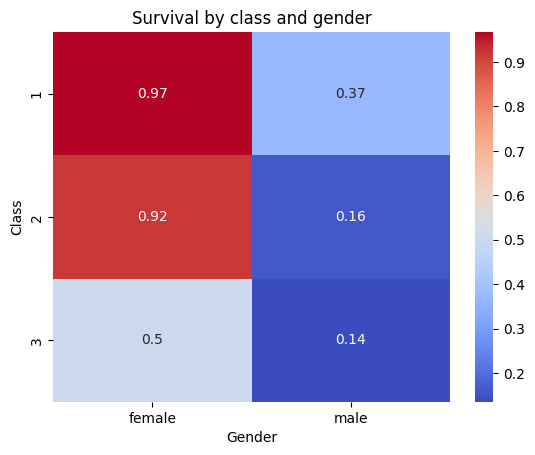

In [11]:
sns.heatmap(pivot, annot=True,cmap="coolwarm")
plt.title("Survival by class and gender")
plt.xlabel("Gender")
plt.ylabel("Class")
plt.show()

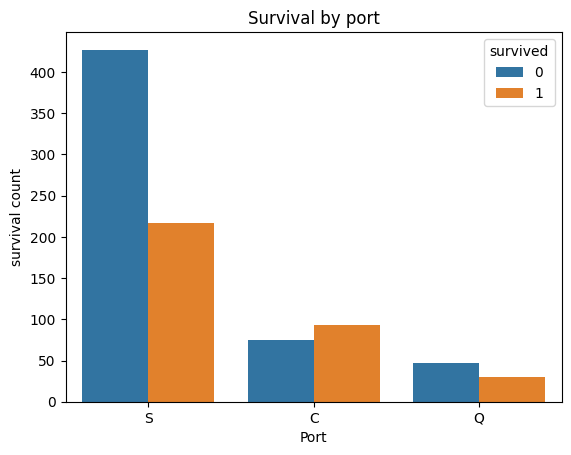

In [12]:
sns.countplot(x='embarked', hue='survived',data=titanic)
plt.title("Survival by port")
plt.xlabel("Port")
plt.ylabel("survival count")
plt.show()

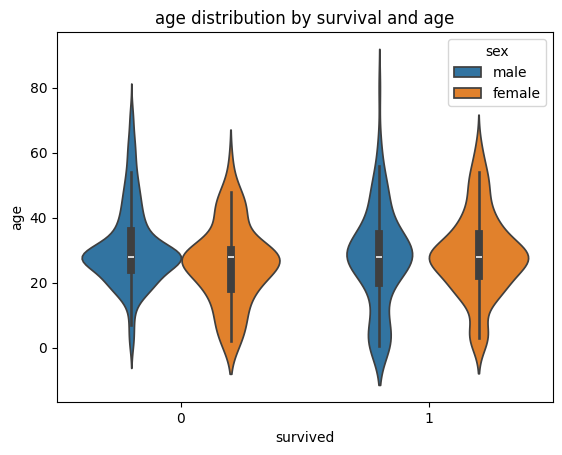

In [13]:
sns.violinplot(x='survived', y='age',data=titanic, hue='sex')
plt.title("age distribution by survival and age")
plt.show()

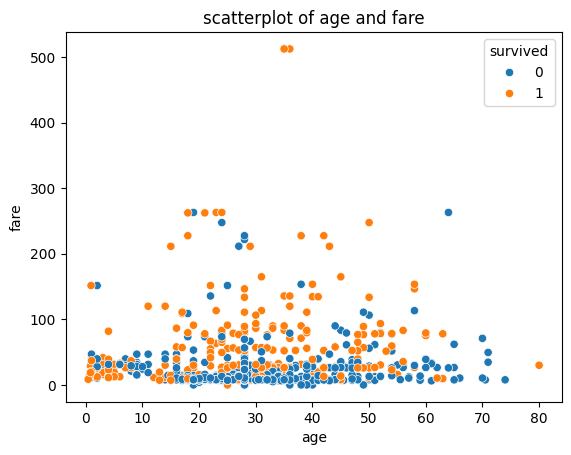

In [14]:
sns.scatterplot(x='age',y='fare',hue='survived', data=titanic)
plt.title("scatterplot of age and fare")
plt.show()

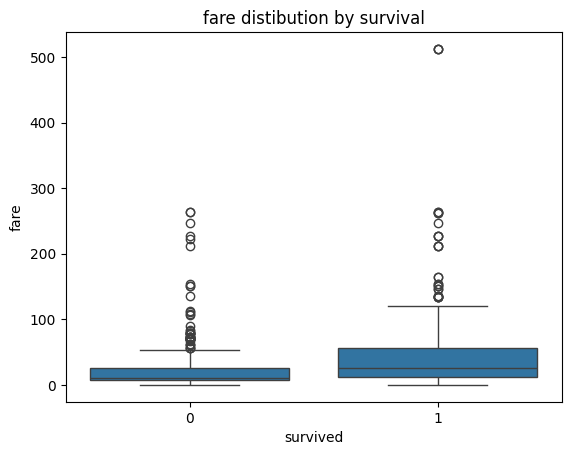

In [15]:
sns.boxplot(x='survived',y='fare', data=titanic)
plt.title("fare distibution by survival")
plt.show()

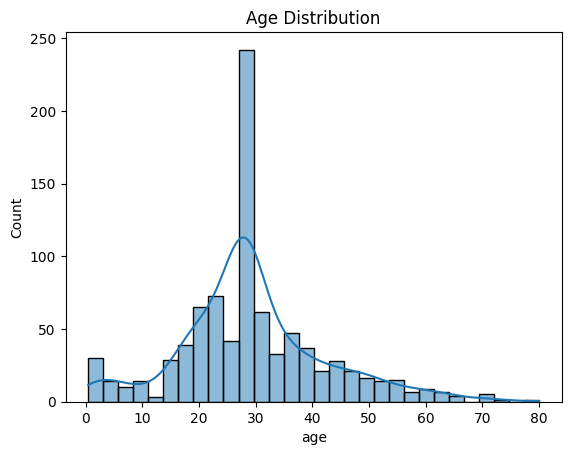

In [16]:
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

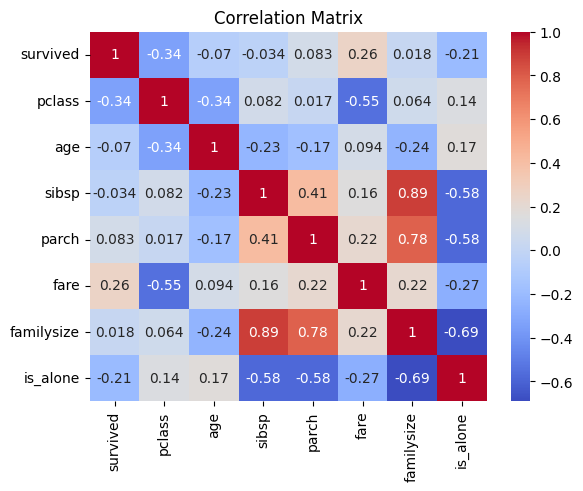

In [17]:
numerical_titanic = titanic.select_dtypes(include=['float64', 'int64'])
corr = numerical_titanic.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()